In [217]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import leastsq


In [257]:
def Michelis_Menten(y, t, *args):
    Vmax = args[0]
    Km   = args[1]
    St   = args[2]
    n    = args[3]
    P    = y[0]
    S    = St - P
    return Vmax*S**n/(Km + S**n)

In [258]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(Michelis_Menten, iv, t, args = p).flatten()
    #print(sim_P)
    res = sim_P[::5] - exp_P
    return res.flatten()

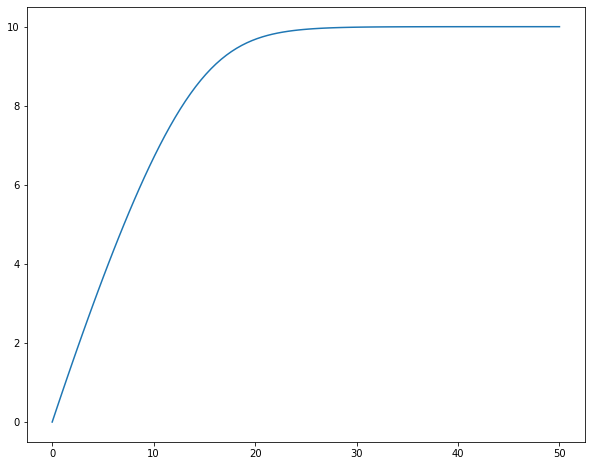

In [267]:
iv = 0
n_steps = 100
t = np.linspace(0, 50, n_steps)
Km    = 3
Vmax  = 1
n     = 1
St    = 10
params = (Vmax, Km, St, n)

v = scipy.integrate.odeint(Michelis_Menten, iv, t, args = params).flatten()

ax = plt.figure(figsize = (10, 8))
plt.plot(t, v)

In [268]:
exp_P = v + np.random.randn(len(v))*0.5
exp_P = exp_P[::5]

In [269]:
initial_guess = [1, 2, 5, 3]
fitted_params = leastsq(residuals, initial_guess)[0]

/Users/dennisjoshy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [270]:
fitted_params

array([1.42072282, 6.33259404, 9.88159168, 0.8593584 ])

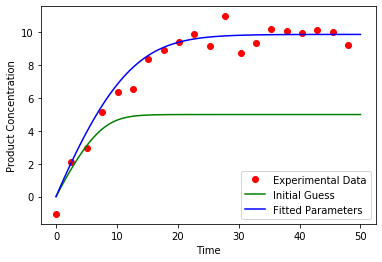

In [271]:
plt.plot(t[::5], exp_P, 'ro')
plt.plot(t, odeint(michelis_menten, iv, t, args = tuple(initial_guess)), 'g-')
plt.plot(t, odeint(michelis_menten, iv, t, args = tuple(fitted_params)), 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

Text(0, 0.5, 'Product Concentration')

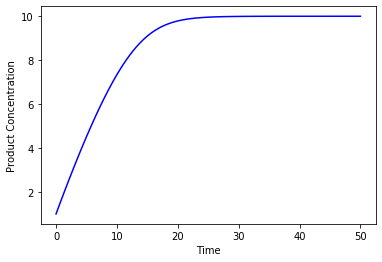

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def michelis_menten(y, t, *args):
    Vmax = args[0]
    km = args[1]
    St = args[2]
    P = y[0]
    S = St - P
     
    dP = Vmax * (S / (S+km))
    return dP
 
# Parameters MM
Vmax = 1
km = 3
St = 10
mm_params = (Vmax, km, St)
 
  
# Initial Conditions MM
P_0 = 1
  
# Timesteps
n_steps = 100
t = np.linspace(0, 50, n_steps)
  
num_P = odeint(michelis_menten, P_0, t, args = (mm_params)).flatten()
 
plt.plot(t, num_P, 'b-')
plt.xlabel('Time')
plt.ylabel('Product Concentration')

In [273]:
exp_P = num_P + np.random.randn(len(num_P)) * 0.5
exp_P = exp_P[::5]

In [274]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(michelis_menten, P_0, t, args = p).flatten()
    res = sim_P[::5] - exp_P
    return res.flatten()

In [275]:
from scipy.optimize import leastsq
initial_guess = [1, 2, 5]
fitted_params = leastsq(residuals, initial_guess)[0]

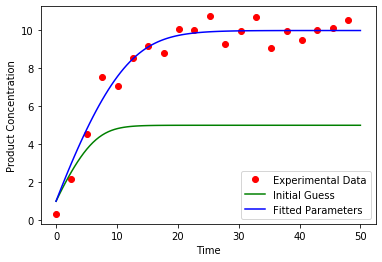

In [276]:
plt.plot(t[::5], exp_P, 'ro')
plt.plot(t, odeint(michelis_menten, P_0, t, args = tuple(initial_guess)), 'g-')
plt.plot(t, odeint(michelis_menten, P_0, t, args = tuple(fitted_params)), 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

In [277]:
fitted_params

array([1.25673406, 4.65600402, 9.99025517])